### Data Prepare (Metric, Config)

In [1]:
import pandas as pd

ex_metrics = pd.read_csv("/home/sein/mk_config/RocksDB/metrics/external/external_results_0.csv")

ex_metrics = ex_metrics.drop(['index'], axis = 1)
# ex_metrics = ex_metrics.round(3)
ex_metrics

,TIME,RATE,WAF,SA
0,21.8,4.77,8.7,72.17
1,25.9,4.02,8.9,55.83
2,52.0,2.00,7.5,34.21
3,53.6,1.94,10.5,56.94
4,20.7,5.02,11.6,98.79
...,...,...,...,...
19995,107.0,0.97,10.0,77.60
19996,41.3,2.52,6.2,73.62
19997,25.9,4.02,8.9,98.40
19998,31.4,3.31,8.7,81.18


In [2]:
import random
import glob
import os
import sys
import pandas as pd

cnt = 0

for xx in range(1,20001):

    path = "/home/sein/mk_config/RocksDB/configs/config{}.cnf".format(xx)
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'])
    
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(["[rocksdb]"],axis=1)

# A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,compaction_pri,compaction_style,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,...,open_files,block_size,cache_index_and_filter_blocks,max_bytes_for_level_base,max_bytes_for_level_multiplier,target_file_size_base,target_file_size_multiplier,num_levels,memtable_bloom_size_ratio,compression_ratio
0,6,16,1304576,3,2,1,0,3,24,44,...,10000,9216,false,5242880,11,1800192,1,8,0.1,0.67
1,2,14,911360,6,2,0,0,7,18,55,...,100000,15360,true,3145728,10,1729536,1,5,0.15,0.5
2,8,6,1474560,6,1,2,0,5,18,48,...,1000000,6144,false,4194304,9,1429504,1,6,0.05,0.36
3,12,8,550912,7,1,3,0,4,18,35,...,10000,3072,true,2097152,11,900096,1,7,0.05,0.63
4,11,15,1426432,5,1,0,0,5,23,59,...,10000,5120,false,5242880,8,560128,1,5,0.2,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,15,551936,5,1,3,0,4,18,56,...,10000,8192,true,3145728,8,1148928,1,5,0.2,0.93
19996,7,8,826368,4,2,2,0,7,18,56,...,1000000,13312,true,7340032,10,922624,2,6,0.05,0.68
19997,6,12,730112,5,2,1,0,7,29,36,...,100000,8192,true,4194304,9,1661952,1,6,0,0.21
19998,9,11,1430528,6,1,3,0,4,25,34,...,100000,13312,true,3145728,9,834560,2,7,0,0.77


In [ ]:
A_config.columns = A_config.columns.str.strip()

A_config

In [4]:
for i in range (len(A_config)):
    if A_config['cache_index_and_filter_blocks'][i] == ' false':
       A_config['cache_index_and_filter_blocks'][i] = 0
        
    else:
        A_config['cache_index_and_filter_blocks'][i] = 1     
    

In [5]:
#### compression type = [' snappy', ' zlib', ' none', ' lz4' ]

for i in range (len(A_config)):
    if A_config['compression_type'][i] == ' snappy':
        A_config['compression_type'][i] = 0
        
    elif A_config['compression_type'][i] == ' zlib':
        A_config['compression_type'][i] = 1    
        
    elif A_config['compression_type'][i] == ' none' :
        A_config['compression_type'][i] = 2
    else:
        A_config['compression_type'][i] = 3
            

### Data Prepare (Config)

- all_samples = config + internal_metrics

In [6]:
all_samples = pd.concat([A_config, ex_metrics], axis=1)
all_samples

,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,compaction_pri,compaction_style,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,...,max_bytes_for_level_multiplier,target_file_size_base,target_file_size_multiplier,num_levels,memtable_bloom_size_ratio,compression_ratio,TIME,RATE,WAF,SA
0,6,16,1304576,3,2,1,0,3,24,44,...,11,1800192,1,8,0.1,0.67,21.8,4.77,8.7,72.17
1,2,14,911360,6,2,0,0,7,18,55,...,10,1729536,1,5,0.15,0.5,25.9,4.02,8.9,55.83
2,8,6,1474560,6,1,2,0,5,18,48,...,9,1429504,1,6,0.05,0.36,52.0,2.00,7.5,34.21
3,12,8,550912,7,1,3,0,4,18,35,...,11,900096,1,7,0.05,0.63,53.6,1.94,10.5,56.94
4,11,15,1426432,5,1,0,0,5,23,59,...,8,560128,1,5,0.2,0.09,20.7,5.02,11.6,98.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,15,551936,5,1,3,0,4,18,56,...,8,1148928,1,5,0.2,0.93,107.0,0.97,10.0,77.60
19996,7,8,826368,4,2,2,0,7,18,56,...,10,922624,2,6,0.05,0.68,41.3,2.52,6.2,73.62
19997,6,12,730112,5,2,1,0,7,29,36,...,9,1661952,1,6,0,0.21,25.9,4.02,8.9,98.40
19998,9,11,1430528,6,1,3,0,4,25,34,...,9,834560,2,7,0,0.77,31.4,3.31,8.7,81.18


### AutoEncoder (raw data + new data)

In [7]:
## 1. config, metrics 따로 minmax
## config+internal 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader
import numpy as np

# samples = pd.concat([configs,metrics], axis=1)
scaler_conf = MinMaxScaler()
scaler_metric = MinMaxScaler()
scaled_configs = scaler_conf.fit_transform(A_config)
scaled_metrics = scaler_metric.fit_transform(ex_metrics)

scaled_samples = np.concatenate([scaled_configs,scaled_metrics], axis=1)

X_train, X_test = train_test_split(scaled_samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=516, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=516, shuffle=True)


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### AutoEncoder

In [8]:
import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(26,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16,16),
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(

        nn.Linear(16,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16, 26), 
        nn.Sigmoid()
    )
  
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Autoencoder().to(device)


critertion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
#lr=1e-4
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trainloss = []
validationloss = []
epoch_list = []

for epoch in range(10000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)
  # epoch_list.append(epoch)
  
  if epoch % 300 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        # optimizer.zero_grad()
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        inputs_np = inputs.cpu().detach().numpy()
        outputs_np = outputs.cpu().detach().numpy()
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))


### Optimization in latent space (TabNet)
- Prediction

In [ ]:

import torch
import pandas as pd
import numpy as np

ex_scaled_new_Samples = torch.Tensor(scaled_samples).to(device)

with torch.no_grad():
    encoded_vector_BO = model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

In [ ]:
len(encoded_vector_BO)


In [ ]:
### TabNet

from sklearn.metrics import r2_score
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(ex_metrics)
# Y_latent = scaled_metrics

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


Y_scaler = MinMaxScaler().fit(lt_y_train)
scaled_lt_y_train = Y_scaler.transform(lt_y_train)
scaled_lt_y_test = Y_scaler.transform(lt_y_test)


lt_regressor = TabNetRegressor(output_dim=4,verbose = 10,seed = 2024, optimizer_fn=torch.optim.AdamW) 
    

lt_regressor.fit(X_train=lt_X_train, y_train=scaled_lt_y_train,
              eval_set=[(lt_X_test, scaled_lt_y_test)],
              patience=100, 
              batch_size = 512,
              max_epochs=10000,
              eval_metric=['rmse'])


lt_predictions = lt_regressor.predict(lt_X_test)


print('BEST VALID SCORE : ', lt_regressor.best_cost)
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))


In [ ]:
print(r2_score(scaled_lt_y_test[:,0], lt_predictions[:,0]))
print(r2_score(scaled_lt_y_test[:,1], lt_predictions[:,1]))
print(r2_score(scaled_lt_y_test[:,2], lt_predictions[:,2]))
print(r2_score(scaled_lt_y_test[:,3], lt_predictions[:,3]))

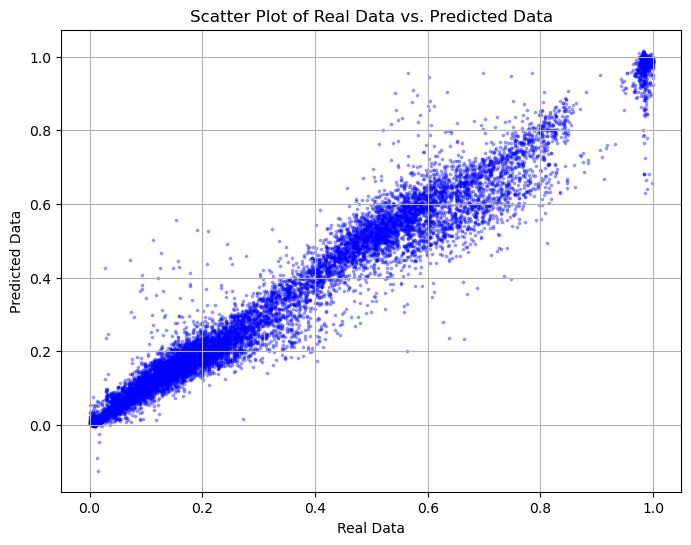

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_lt_y_test, lt_predictions, color='blue', alpha=0.3, s=3)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.title('Scatter Plot of Real Data vs. Predicted Data')
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(scaled_lt_y_test.reshape(-1,1).squeeze(),label='Test Data', color='lightskyblue')
sns.kdeplot(lt_predictions.reshape(-1,1).squeeze(), label='Prediction Data', color='palevioletred')
plt.legend(loc='upper right')

In [15]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
# latent_pd_T.index

In [53]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, regressor):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics

        self.regressor = regressor

        
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        KB = 1024
        MB = 1024 * 1024
        self.option = {
        "max_background_compactions": [i for i in range(1, 17)], # D:1, B:4 ~ 32
        "max_background_flushes": [i for i in range(1, 17)], #D:1, B:4~32
        "write_buffer_size": [s * KB for s in range(512, 2048)], #D:64M, B:0.25M ~ 1M
        "max_write_buffer_number": [i for i in range(2, 9)], #D:2, B:2~16
        "min_write_buffer_number_to_merge": [i for i in range(1, 3)], #D:1
        "compaction_pri": { #D:0
            "kByCompensatedSize" : 0,
            "kOldestLargestSeqFirst" : 1,
            "kOldestSmallestSeqFirst" : 2,
            "kMinOverlappingRatio" : 3
        },
        "compaction_style": { #D:0
            "kCompactionStyleLevel" : 0, 
            "kCompactionStyleUniversal" : 1,
            "kCompactionStyleFIFO" : 2,
            "kCompactionStyleNone" : 3
        },
        "level0_file_num_compaction_trigger": [i for i in range(2, 9)], #D:4, B:2 ~ 8
        "level0_slowdown_writes_trigger": [i for i in range(16, 33)], #D:20, B:16 ~ 64
        "level0_stop_writes_trigger": [i for i in range(32, 65)], #D:36, B:64 ~ 128
        "compression_type": {
            "snappy" : 0,
            "zlib" : 1,
            "lz4" : 2,
            "none" : 3}, #D:"snappy", B:no "bzip2"
        "bloom_locality": [0, 1], #D:0
        "open_files": [-1, 10000, 100000, 1000000], #D:-1 B:-1
        "block_size": [s * KB for s in range(2, 17)], #D:4096, B:4096 ~ 32768
        "cache_index_and_filter_blocks": 
            {"true" : 1, 
             "false" : 0
             },#D:false
        "memtable_bloom_size_ratio": [0, 0.05, 0.1, 0.15, 0.2], #D:0
        "compression_ratio": [i/100 for i in range(100)], #D:0.5, B:0.1 ~ 0.9
        "max_bytes_for_level_base": [s * MB for s in range(2, 9)], #D:256M, B:1M ~ 16M
        "max_bytes_for_level_multiplier": [i for i in range(8, 13)], #D:10, B:6 ~ 10
        "target_file_size_base": [s * KB for s in range(512, 2049)], #D:64M, B:0.25M ~ 4M
        "target_file_size_multiplier": [ i for i in range(1, 3)], #D:1, B:1 ~ 2
        "num_levels": [5, 6, 7, 8] #D:7, B:7
    }

   
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
            
            
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)
        res = self.regressor.predict(x)
        
        target_res0 = -res[:,0]
        target_res1 = res[:,1]
        target_res2 = -res[:,2]
        target_res3 = -res[:,3]
        
        target_0 = 5.32 / target_res0
        target_1 = target_res1 / 19.5
        target_2 = target_res2 / 10.6
        target_3 = target_res3 / 56.84
        
        
        weights = [0.25, 0.25, 0.25, 0.25]  
        # target_value = np.sum([target_res0, target_res1, target_res2, target_res3] * np.array(weights))
        target_value = np.sum([target_res0, target_res1, target_res2, target_res3] * np.array(weights))

        
        return target_value
        # return target_value.squeeze()
    
        # return res
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2024)

        self.acquisition_function = UtilityFunction(kind="ei", kappa=0.0, xi=0.00001)
        
        self.optimizer.maximize(n_iter=self.iteration, init_points=80, acquisition_function=self.acquisition_function)
    

### Bayesian Optimization

In [ ]:
tuner1 = BO(iteration=300, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=ex_metrics,
           regressor=lt_regressor
           )
# tuner1.train_regression_model()tuner1.tune()


In [45]:
ex_data= [ 0.0       , 0.2025    , 0.3126    , 0.3283    , 0.3499    , 0.7397    , 0.6553    , 0.8132    , 0.7443    , 0.1799    , 0.2791    , 0.3662    , 0.3365    , 0.5038    , 0.6229    , 0.4789  ]

In [46]:
# Decoding to real dimension

ex_data = torch.tensor(ex_data).unsqueeze(0)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    AE_model.eval()
    decode_value = AE_model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([[9.9749e-01, 1.0000e+00, 7.4283e-01, 3.6152e-08, 1.0000e+00, 8.2928e-04,
         6.8843e-15, 8.6626e-01, 9.9751e-01, 2.4936e-02, 9.9996e-01, 2.4021e-31,
         3.4121e-20, 9.9611e-01, 9.9969e-01, 7.5133e-09, 9.8205e-01, 1.8591e-01,
         1.0000e+00, 6.0153e-03, 8.5840e-01, 9.8867e-01, 1.5263e-03, 8.7559e-01,
         5.5884e-01, 9.9999e-01]], device='cuda:0')


In [47]:
converted_values = [float(value) for value in decode_value[0]]


In [48]:
df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:22] 
real_v = np.array(real_bo_config)

rescaled_bo_config = scaler_conf.inverse_transform(real_v.reshape(1,-1))


In [49]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,15.962343574,15.999967813,1691894.968994141,2.000000217,2.000000000,0.002487830,0.000000000,7.197584271,31.960224152,32.797964394,...,-1.000000000,16328.300781250,0.999688745,2097152.047269888,11.928212404,816705.898437500,2.000000000,5.018046027,0.171679652,0.978786773


In [50]:
for i in range (len(A_config.columns)):
    print('"{}" : {},'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

"max_background_compactions" : 16,
"max_background_flushes" : 16,
"write_buffer_size" : 1691895,
"max_write_buffer_number" : 2,
"min_write_buffer_number_to_merge" : 2,
"compaction_pri" : 0,
"compaction_style" : 0,
"level0_file_num_compaction_trigger" : 7,
"level0_slowdown_writes_trigger" : 32,
"level0_stop_writes_trigger" : 33,
"compression_type" : 3,
"bloom_locality" : 0,
"open_files" : -1,
"block_size" : 16328,
"cache_index_and_filter_blocks" : 1,
"max_bytes_for_level_base" : 2097152,
"max_bytes_for_level_multiplier" : 12,
"target_file_size_base" : 816706,
"target_file_size_multiplier" : 2,
"num_levels" : 5,
"memtable_bloom_size_ratio" : 0,
"compression_ratio" : 1,
